In [1]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np

In [4]:
x_data = np.array([[1,2,0], [5,4,3], [1,2,-1], [3,1,0], [2,4,2],
                  [4,1,2], [-1,3,2], [4,3,3], [0,2,6], [2,2,1],
                  [1,-2,-2], [0,1,3], [1,1,3], [0,1,4], [2,3,3]])

t_data = np.array([-4,4,-6,3,-4,9,-7,5,6,0,4,3,5,5,1])

In [5]:
print('x_shape = ', x_data.shape, 't_shape = ', t_data.shape)

x_shape =  (15, 3) t_shape =  (15,)


In [6]:
model = Sequential()
model.add(Dense(1, input_shape = (3,), activation = 'linear'))

c:\Users\ldhsp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
hist = model.fit(x_data, t_data, epochs = 1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2110
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2012
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1919
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1830
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1745
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1664
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1587
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1513
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1443
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1376
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1313
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1252
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1194
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1139
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1087
Epoc

In [21]:
test_data = [[5,5,0], [2,3,1], [-1,0,-1], [10,5,2], [4,-1,-2]]
ret_val = [2*data[0]+3*data[1]+2*data[2] for data in test_data]
prediction_val = model.predict(np.array(test_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [22]:
print('================')
print(prediction_val)
print('================')
print(ret_val)

[[-4.99971  ]
 [-3.000079 ]
 [-4.0007076]
 [ 9.000827 ]
 [ 6.99957  ]]
[25, 15, -4, 39, 1]


In [23]:
import matplotlib.pyplot as plt

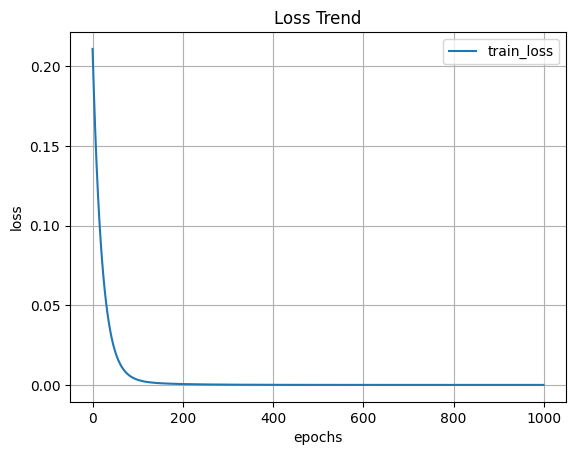

In [24]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label = 'train_loss')
plt.legend(loc = 'best')
plt.show()